## Data cleaning and Explorative Analysis

This part of the development process involves the use of cleaning commands from Pandas and general python programming. One would need to check for any blank or null data entries in the data set 

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [25]:
df= pd.read_csv('/workspaces/Twitter-Sentiment-Analysis---NLP-with-generic-machine-learning/twitter_training.csv')

In [26]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


**One will need to check for any missing values.**


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [28]:
df= df.rename(columns={'2401': 'Tweet ID', 'Borderlands':'Entity','Positive':'Sentiment', 'im getting on borderlands and i will murder you all ,' :'Tweet content'})

In [29]:
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [30]:
df.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet content    686
dtype: int64

In [31]:
df= df.dropna()

In [32]:
df.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [33]:
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


**One can also check if the classes are balanced , we see that the supposed label categories are not balanced with Irrelevant category being the least represented.**

<Axes: xlabel='Sentiment', ylabel='count'>

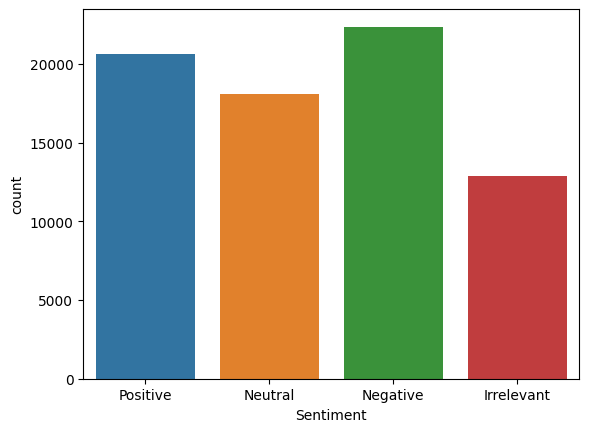

In [34]:
sns.countplot(data=df, x='Sentiment', hue='Sentiment')

The provider of the dataset mentioned that irrelevant records are neutral beacuse they do are not relevant to any entity , we want to do Positive , Negative or Neutral sentiment analysis hence we do not need the Irrelevant category.

In [35]:
w=df['Sentiment']!='Irrelevant'
w

0        True
1        True
2        True
3        True
4        True
         ... 
74676    True
74677    True
74678    True
74679    True
74680    True
Name: Sentiment, Length: 73995, dtype: bool

In [36]:
df= df[w]
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

One will also need to consider any reviews that are empty spaces mistaken for text

In [37]:
df['Tweet content'].str.isspace().sum()


np.int64(139)

In [38]:
df = df[~df['Tweet content'].str.isspace()]
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


Saving the cleaned training data

In [39]:
#df.to_csv('twitter_training_cleaned.csv')

**Now one will need to do these same cleaning and arrangement tasks on the validation set named df1**

In [40]:
df1= pd.read_csv('/workspaces/Twitter-Sentiment-Analysis---NLP-with-generic-machine-learning/twitter_validation.csv')

In [41]:
df1

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


Renaming the Columns correctly 

In [42]:
df1= df1.rename(columns={'3364': 'Tweet ID', 'Facebook':'Entity','Irrelevant':'Sentiment', "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":'Tweet content'})

In [43]:
df1

,Tweet ID,Entity,Sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


Cleaning out null data from the validation set 

In [44]:
df1.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [45]:
w1=df1['Sentiment']!='Irrelevant'
w1

0       True
1       True
2       True
3       True
4       True
       ...  
994    False
995    False
996     True
997     True
998     True
Name: Sentiment, Length: 999, dtype: bool

Removing the irrelevant sentiments since they are not apart of what our objective

In [46]:
df1= df1[w1]
df1

,Tweet ID,Entity,Sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
992,314,Amazon,Negative,Please explain how this is possible! How can t...
993,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


<Axes: xlabel='Sentiment', ylabel='count'>

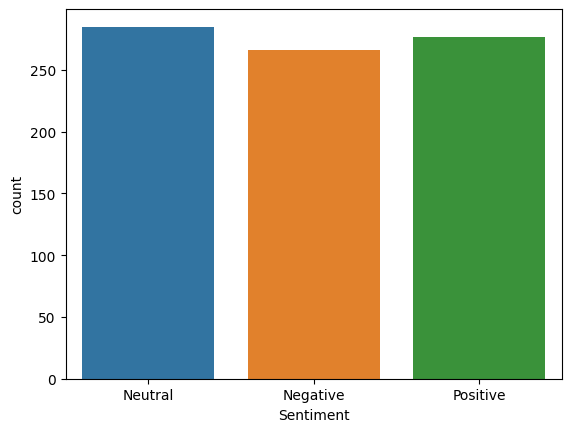

In [47]:
sns.countplot(data=df1, x='Sentiment', hue='Sentiment')

I will now check for any blank spaces mistaken for content 

In [48]:
df1['Tweet content'].str.isspace().sum()

np.int64(0)

The validation set is clean and ready for use , hence we save it.

In [ ]:
#df1.to_csv('twitter_validation_clened.csv')